In [3]:
import numpy as np

def cpn_cmap(N=256, normalized=False):
    def bitget(byteval, idx):
        return ((byteval & (1 << idx)) != 0)

    dtype = 'float32' if normalized else 'uint8'
    cmap = np.zeros((N, 3), dtype=dtype)
    for i in range(N):
        r = g = b = 0
        c = i
        for j in range(8):
            r = r | (bitget(c, 0) << 7-j)
            g = g | (bitget(c, 1) << 7-j)
            b = b | (bitget(c, 2) << 7-j)
            c = c >> 3

        cmap[i] = np.array([r, g, b])

    cmap = cmap/255 if normalized else cmap
    return cmap

In [8]:
cpn_cmap()[255]

array([224, 224, 192], dtype=uint8)

In [19]:
def lpmap(N=2, lbl=False):

    cmap = np.zeros((N, 3), dtype='uint8')
    cmap[0] = np.array([224, 224, 192])
    cmap[1] = np.array([0, 0, 255]) if lbl else np.array([255, 0, 0])

    return cmap
lpmap()

array([[224, 224, 192],
       [255,   0,   0]], dtype=uint8)

In [22]:
tmp = np.random.randint(low=0, high=2, size=(3, 2, 2))
lpmap()[tmp].shape

(3, 2, 2, 3)

In [18]:
tmp

array([[[1, 0],
        [1, 0]],

       [[1, 0],
        [0, 0]],

       [[0, 1],
        [0, 1]]])

In [24]:
tmp[0].shape

(2, 2)

In [1]:
import torch
torch.load('/data1/sdi/MUnetPlus-result/deeplabv3plus_resnet101/Apr27_04-27-17_CPN_six/best_param/checkpoint.pt')

OrderedDict([('module.backbone.conv1.weight',
              tensor([[[[ 1.9827e-02, -4.0725e-03, -1.7475e-02,  ..., -1.4673e-02,
                         -1.6548e-03,  8.7138e-03],
                        [-3.7379e-03,  2.9832e-03, -1.5572e-02,  ..., -8.1726e-02,
                         -7.2770e-02, -3.9931e-02],
                        [ 3.5543e-03,  2.5560e-02,  4.8510e-02,  ...,  3.1405e-02,
                          1.2300e-02,  2.5821e-02],
                        ...,
                        [-3.4675e-02, -1.2488e-01, -2.9189e-01,  ..., -3.5976e-01,
                         -1.2557e-01,  4.0426e-02],
                        [ 1.4679e-02,  2.2152e-02,  5.8469e-03,  ..., -1.5853e-01,
                         -1.7594e-01, -9.4363e-02],
                        [-2.9192e-02, -1.1063e-02,  4.7788e-02,  ...,  1.5721e-01,
                          9.9596e-02, -1.2731e-02]],
              
                       [[ 8.7361e-03, -5.5389e-03, -1.1672e-02,  ..., -1.3095e-02,
                

In [1]:
########################################################################################################################
wrist_HM70A_train_idx = [427, 259, 454, 505, 104, 543, 411, 146, 550, 152, 481, 326, 284,
             13, 438, 71, 600, 139, 478, 428, 43, 285, 58, 445, 130, 190, 598,
             564, 159, 601, 232, 475, 622, 164, 556, 372, 339, 177, 250, 540,
             432, 117, 235, 369, 116, 468, 136, 249, 205, 241, 547, 417, 628,
             83, 147, 573, 635, 553, 485, 278, 240, 597, 169, 50, 286, 56, 631,
             484, 179, 329, 165, 639, 461, 470, 609, 618, 185, 617, 388, 581,
             112, 464, 501, 89, 254, 537, 621, 507, 200, 47, 347, 596, 531, 585,
             155, 84, 393, 227, 398, 493, 70, 636, 199, 368, 67, 627, 449,
             408, 322, 167, 558, 168, 75, 310, 23, 576, 103, 574, 480, 119,
             455, 477, 35, 294, 137, 341, 236, 467, 397, 350, 340, 319, 384,
             409, 225, 34, 51, 496, 39, 629, 221, 348, 595, 36, 108, 354, 567,
             309, 395, 380, 568, 298, 557, 196, 24, 215, 61, 74, 458, 386, 9,
             180, 160, 366, 562, 325, 465, 268, 392, 237, 246, 207, 357, 148,
             410, 554, 184, 274, 439, 91, 115, 293, 223, 476, 404, 295, 492, 
             229, 619, 306, 425, 62, 182, 127, 379, 288, 421, 178, 630, 230,
             302, 98, 608, 563, 457, 161, 312, 193, 383, 330, 378, 442, 566,
             436, 599, 508, 40, 2, 216, 443, 174, 96, 406, 296, 626, 586, 187,
             503, 321, 212, 269, 92, 479, 474, 197, 186, 132, 53, 337, 271, 
             346, 374, 624, 343, 66, 258, 578, 437, 242, 514, 512, 472, 37, 
             287, 375, 523, 400, 356, 373, 502, 281, 349, 446, 208, 328, 323,
             77, 129, 113, 33, 283, 194, 359, 171, 433, 351, 403, 516, 8, 
             12, 59, 399, 198, 299, 580, 97, 358, 267, 511, 327, 290, 41, 125, 
             100, 15, 353, 462, 10, 82, 389, 575, 524, 602, 120, 422, 483,
             191, 488, 156, 376, 352, 4, 620, 611, 297, 623, 396, 471, 121,
             377, 111, 584, 94, 64, 370, 32, 175, 607, 344, 109, 126, 324,
             577, 22, 335, 605, 301, 228, 316, 73, 490, 345, 456, 361, 110, 
             473, 260, 412, 548, 520, 545, 332, 99, 420, 588, 401, 634, 604, 
             522, 509, 495, 640, 57, 233, 498, 262, 569, 367, 60, 133, 247, 
             434, 334, 142, 218, 248, 593, 63, 592, 52, 579, 124, 405, 289,
             7, 69, 135, 5, 255, 209, 517, 68, 304, 583, 638, 204, 188, 214,
             166, 497, 195, 282, 72, 206, 582, 513, 102, 55, 151, 292, 613,
             625, 149, 131, 272, 202, 533, 541, 213, 3, 362, 243, 16, 263,
             591, 391, 170, 14, 431, 355, 363, 549, 273, 305, 27, 143, 336, 
             266, 594, 300, 158, 128, 331, 499, 95, 606, 544, 253, 452, 538, 
             546, 224, 163, 105, 565, 42, 515, 318, 308, 435, 413, 11, 402,
             633, 521, 429, 303, 571, 418, 30, 276, 614, 342, 226, 86, 238, 
             18, 44, 487, 382, 587, 277, 390, 145, 315, 555, 256, 25, 530,
             172, 534, 234, 415, 140, 559, 17, 333, 385, 26, 423, 482, 157,
             203, 189, 460, 506, 489, 426, 154, 211, 314, 504]

wrist_HM70A_valid_idx = [637, 78, 19, 360, 441, 264, 364, 444, 173, 603, 210, 371, 632,
             552, 424, 114, 317, 245, 251, 107, 313, 394, 463, 217, 525, 231,
             510, 138, 570, 162, 48, 31, 529, 118, 265, 6, 261, 79, 38, 183,
             219, 416, 153, 610, 451, 491, 81, 85, 561, 106, 387, 407, 222,
             381, 279, 20, 280, 123, 88, 519, 447, 560, 244, 612, 311, 453,
             21, 0, 518, 539, 141, 122, 49, 448, 616, 65, 466, 469, 275, 535,
             181, 526, 90, 176, 291, 590, 486, 93, 87, 192, 320, 414, 615,
             500, 101, 257, 450, 252, 54, 46, 150, 338, 201, 532, 365, 494,
             134, 29, 551, 45, 76, 528, 440, 270, 144, 572, 419, 430, 536,
             307, 459, 239, 542, 589, 220, 1, 28, 527, 80]

########################################################################################################################
forearm_HM70A_train_idx = [123, 73, 41, 112, 131, 57, 125, 111, 139, 140, 67, 138, 129, 47, 150,
             97, 147, 8, 18, 158, 132, 83, 74, 12, 2, 75, 50, 40, 128, 44, 58, 126,
             56, 100, 89, 92, 62, 86, 10, 71, 34, 94, 148, 91, 31, 17, 59, 121, 11,
             104, 127, 4, 120, 81, 96, 103, 159, 161, 38, 154, 160, 88, 79, 32, 136,
             106, 36, 3, 143, 99, 119, 156, 151, 7, 63, 105, 95, 42, 22, 68, 55, 118,
             113, 21, 0, 6, 37, 69, 27, 13, 33, 49, 98, 72, 65, 133, 107, 19, 114,
             23, 52, 53, 145, 5, 90, 48, 130, 85, 35, 78, 146, 102, 93, 87, 115, 64,
             70, 149, 153, 137, 152, 116, 108, 101, 9, 157, 66, 124, 43]

forearm_HM70A_valid_idx = [135, 54, 46, 155, 82, 20, 109, 25, 134, 29, 39, 142, 84, 45, 76, 16,
             14, 122, 144, 60, 24, 51, 61, 110, 30, 77, 26, 117, 1, 28, 15, 80, 141]

########################################################################################################################
wrist_miniSONO_train_idx = [11, 164, 288, 118, 277, 64, 270, 24, 41, 45, 101, 28, 75, 27, 74, 201, 
                            110, 240, 25, 107, 307, 272, 148, 309, 20, 174, 243, 139, 16, 249, 175, 
                            276, 188, 301, 264, 22, 14, 244, 257, 260, 162, 165, 36, 197, 13, 73, 253, 
                            178, 281, 131, 3, 215, 150, 217, 128, 35, 238, 48, 67, 170, 43, 2, 239, 271, 
                            232, 171, 308, 77, 283, 306, 100, 70, 237, 241, 251, 34, 76, 199, 153, 141, 
                            159, 115, 225, 78, 39, 65, 86, 72, 124, 47, 180, 137, 221, 106, 192, 252, 38, 
                            224, 216, 173, 54, 62, 126, 147, 245, 296, 68, 214, 205, 193, 125, 136, 302, 
                            133, 191, 259, 236, 209, 112, 294, 184, 297, 284, 17, 152, 105, 4, 265, 258, 
                            204, 263, 229, 130, 208, 88, 255, 142, 167, 83, 1, 127, 248, 299, 269, 242, 149, 
                            198, 49, 207, 300, 82, 122, 144, 71, 268, 23, 50, 10, 169, 6, 280, 212, 177, 292, 
                            156, 33, 46, 146, 213, 230, 279, 108, 85, 37, 210, 161, 18, 102, 44, 223, 63, 310, 
                            190, 92, 95, 129, 275, 273, 176, 305, 246, 57, 80, 116, 15, 40, 30, 200, 117, 286, 
                            168, 206, 53, 7, 99, 160, 220, 202, 183, 21, 186, 233, 12, 140, 222, 278, 132, 59, 
                            84, 185, 203, 196, 138, 31, 114, 166, 91, 267, 187, 93, 211, 172, 219, 55, 285, 51, 
                            32, 94, 266, 226, 104, 135, 143, 189, 134, 121, 9, 289]

wrist_miniSONO_valid_idx = [0, 256, 5, 261, 262, 8, 145, 274, 19, 151, 26, 154, 155, 29, 157, 158, 282, 287, 
                            290, 163, 291, 293, 295, 42, 298, 303, 304, 179, 52, 181, 182, 56, 58, 60, 61, 66, 
                            194, 195, 69, 79, 81, 87, 89, 90, 218, 247, 96, 97, 98, 227, 228, 103, 231, 234, 235, 
                            109, 111, 113, 119, 120, 250, 123, 254]

########################################################################################################################
forearm_miniSONO_train_idx = [86, 164, 155, 78, 177, 6, 117, 123, 98, 95, 47, 162, 108, 128, 84, 165, 75, 113, 36,
                              99, 37, 136, 133, 14, 180, 11, 3, 100, 0, 4, 102, 188, 9, 10, 171, 22, 132, 138, 66, 
                              172, 15, 187, 92, 110, 163, 69, 156, 190, 167, 56, 20, 61, 18, 139, 106, 70, 122, 19, 
                              143, 88, 109, 134, 23, 157, 25, 173, 44, 181, 185, 115, 144, 42, 120, 16, 116, 151, 
                              184, 148, 142, 101, 94, 17, 145, 96, 40, 83, 85, 52, 93, 169, 97, 8, 24, 166, 111, 
                              160, 125, 121, 158, 31, 161, 126, 189, 107, 182, 58, 50, 38, 28, 32, 170, 57, 175, 5, 
                              147, 77, 119, 29, 127, 74, 91, 13, 41, 1, 146, 149, 39, 112, 72, 67, 21, 131, 49, 135, 
                              114, 81, 64, 124, 62, 68, 118, 129, 51, 183, 153, 46, 141, 87, 90, 150, 89, 27, 34]

forearm_miniSONO_valid_idx = [2, 130, 7, 137, 12, 140, 152, 26, 154, 30, 159, 33, 35, 168, 43, 45, 174,
                              48, 176, 178, 179, 53, 54, 55, 186, 59, 60, 63, 65, 71, 73, 76, 79, 80,
                              82, 103, 104, 105]

########################################################################################################################

In [2]:
len(forearm_HM70A_train_idx)

129

In [3]:
len(forearm_HM70A_valid_idx)

33

In [11]:
for i in range(1114, 1152):
    with open('/data1/sdi/datasets/Median/splits/val.txt', "a") as f:
        f.write(str(i).zfill(7) + '\n')

In [3]:
import socket
name = socket.gethostname()
print(type(name), name)

<class 'str'> server5


In [4]:
socket.gethostbyaddr(socket.gethostname())

('server5', [], ['127.0.1.1'])

In [6]:
os.getcwd()

'/data1/sdi/CPNKD'

In [8]:
os.path.dirname(os.path.abspath(__file__))

NameError: name '__file__' is not defined

In [9]:
os.path.dirname(__file__)

NameError: name '__file__' is not defined

In [19]:
import torch
import torch.nn as nn

loss = nn.BCELoss()
m = nn.Sigmoid()
input = torch.randn(3, requires_grad=True)
target = torch.rand(3)

tensor(0.7226, grad_fn=<BinaryCrossEntropyBackward0>)

In [35]:
output = loss(m(input), target)
output

tensor(0.7226, grad_fn=<BinaryCrossEntropyBackward0>)

In [50]:
print("target: ", target)
print("input: ", m(input))

target:  tensor([0.3795, 0.2315, 0.9320])
input:  tensor([0.3436, 0.7384, 0.7126], grad_fn=<SigmoidBackward0>)


In [54]:
import math
0.3795*math.log(0.3436) + (1 - 0.3795)*math.log(1 - 0.3436) 

-0.6666322979418657

In [55]:
0.2315*math.log(0.7384) + (1 - 0.2315)*math.log(1 - 0.7384)

-1.1007182711743972

In [56]:
0.9320*math.log(0.7126) + (1 - 0.9320)*math.log(1 - 0.7126)

-0.4005821048182245

In [59]:
(0.6666322979418657 + 1.1007182711743972 + 0.4005821048182245) / 3

0.7226442246448291

In [48]:
(0.2895147284546368+0.47803587130112785+0.1739705976717449)/3

0.31384039914250317

In [60]:
tmp = {
    'alpha' : 0.3
}

In [72]:
torch.randint(0, 1, (2, 2))

tensor([[0, 0],
        [0, 0]])

In [79]:
def txt_to_json(txt_path: str):

    with open(txt_path, "r") as f:
        s = [x.split(" : ") for x in f.readlines()]
    
    jdict = {}
    for x in s:
        if len(x) == 2:
            jdict[x[0].strip()] = x[1].strip()
        else:
            jdict["Time elapsed"] = x

    return jdict

In [81]:
txt_to_json('/data1/sdi/CPNnetV1-result/deeplabv3plus_resnet50/May12_01-31-37_Median/summary.txt')

{'default_path': '/data1/sdi/CPNnetV1-result',
 'current_time': 'May12_01-31-37',
 'Tlog_dir': '/data1/sdi/CPNnetV1-result',
 'save_log': 'True',
 'model': 'deeplabv3plus_resnet50',
 'separable_conv': 'False',
 'output_stride': '64',
 'num_workers': '4',
 'data_root': '/data1/sdi/datasets/',
 'dataset': 'Median',
 'num_classes': '2',
 'is_rgb': 'True',
 'resize': '(496, 468)',
 'crop_size': '(512, 448)',
 'scale_factor': '0.5',
 'random_seed': '1',
 'gpus': '4,5,6,7',
 'total_itrs': '5000',
 'lr': '0.1',
 'loss_type': 'ap_entropy_dice_loss',
 'optim': 'SGD',
 'lr_policy': 'poly',
 'step_size': '1000',
 'weight_decay': '0.0005',
 'momentum': '0.9',
 'batch_size': '160',
 'patience': '200',
 'delta': '0.005',
 'val_interval': '2',
 'val_batch_size': '64',
 'save_model': 'True',
 'save_ckpt': '/data1/sdi/CPNnetV1-result/deeplabv3plus_resnet50/May12_01-31-37_Median/best_param',
 'val_results': 'True',
 'val_results_dir': '/data1/sdi/CPNnetV1-result/deeplabv3plus_resnet50/May12_01-31-37_Med

In [82]:
import os
os.path.dirname('/data1/sdi/CPNnetV1-result/deeplabv3plus_resnet50/May12_01-31-37_Median/summary.txt')

'/data1/sdi/CPNnetV1-result/deeplabv3plus_resnet50/May12_01-31-37_Median'

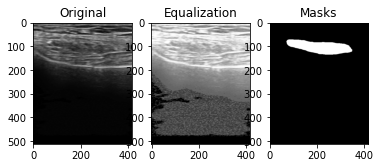

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/data1/sdi/datasets/CPN_all/Images/FH_I0000677.bmp', cv2.IMREAD_GRAYSCALE)
ma = cv2.imread('/data1/sdi/datasets/CPN_all/Masks/FH_I0000677_mask.bmp', cv2.IMREAD_GRAYSCALE)

hist, bins = np.histogram(img.flatten(), 256,[0,256])

cdf = hist.cumsum()

# cdf의 값이 0인 경우는 mask처리를 하여 계산에서 제외
# mask처리가 되면 Numpy 계산에서 제외가 됨
# 아래는 cdf array에서 값이 0인 부분을 mask처리함
cdf_m = np.ma.masked_equal(cdf,0)

#History Equalization 공식
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())

# Mask처리를 했던 부분을 다시 0으로 변환
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]
plt.subplot(131),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.subplot(132),plt.imshow(img2, cmap='gray'),plt.title('Equalization')
plt.subplot(133),plt.imshow(ma, cmap='gray'),plt.title('Masks')
plt.show()

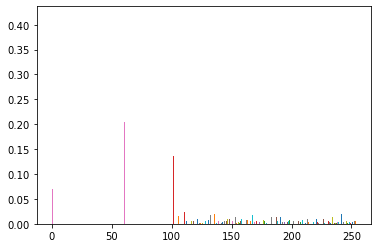

In [7]:
plt.hist(np.array(img2, dtype='uint8'), bins=[i for i in range(255)], density=True, align='mid')
plt.show()

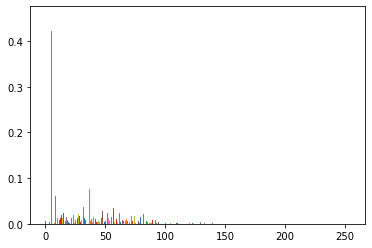

In [9]:
plt.hist(np.array(img, dtype='uint8'), bins=[i for i in range(255)], density=True, align='mid')
plt.show()

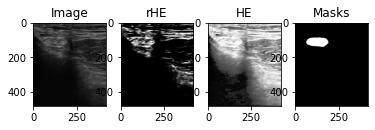

In [5]:
from PIL import Image, ImageOps
from matplotlib import pyplot as plt

img = Image.open('/data1/sdi/datasets/CPN_all/Images/FN_I0020546.bmp').convert('L')
ma = Image.open('/data1/sdi/datasets/CPN_all/Masks/FN_I0020546_mask.bmp').convert('L')

result = ImageOps.equalize(img, ma)
result_HE = ImageOps.equalize(img, )

plt.subplot(141), plt.imshow(img, cmap='gray'), plt.title('Image')
plt.subplot(142), plt.imshow(np.array(result), cmap='gray'), plt.title('rHE')
plt.subplot(143), plt.imshow(np.array(result_HE), cmap='gray'), plt.title('HE')
plt.subplot(144), plt.imshow(ma, cmap='gray'), plt.title('Masks')
plt.show()

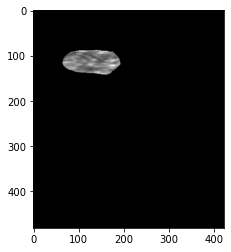

In [67]:
plt.imshow(np.array(img) * (np.array(ma)/255), cmap='gray')

In [12]:
np.array(img)[np.where(np.array(ma) > 0)]

array([ 94,  94,  94, ...,  96, 126, 113], dtype=uint8)

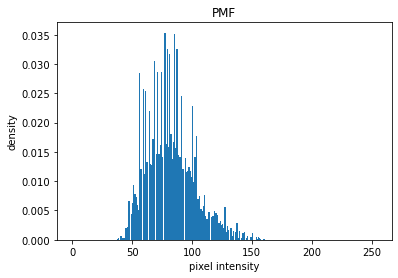

In [15]:
plt.hist(np.array(img, dtype=np.uint8)[np.where(np.array(ma) > 0)], bins=[i for i in range(255)], density=True, align='mid')
plt.title('PMF')
plt.xlabel('pixel intensity')
plt.ylabel('density')
plt.savefig('/data1/sdi/PMF.png')
plt.show()

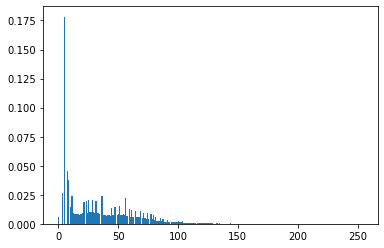

In [117]:
plt.hist(np.array(img, dtype=np.uint8), bins=[i for i in range(255)], density=True, align='mid')
plt.show()

(array([[  0.,   0.,   0., ...,   8.,   1.,   0.],
        [  0.,   0.,   0., ...,  13.,   1.,   0.],
        [  0.,   0.,   0., ...,  10.,  11.,   0.],
        ...,
        [416.,   0.,   0., ...,   0.,   0.,   0.],
        [416.,   0.,   0., ...,   0.,   0.,   0.],
        [416.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([  0.        ,   4.47368421,   8.94736842,  13.42105263,
         17.89473684,  22.36842105,  26.84210526,  31.31578947,
         35.78947368,  40.26315789,  44.73684211,  49.21052632,
         53.68421053,  58.15789474,  62.63157895,  67.10526316,
         71.57894737,  76.05263158,  80.52631579,  85.        ,
         89.47368421,  93.94736842,  98.42105263, 102.89473684,
        107.36842105, 111.84210526, 116.31578947, 120.78947368,
        125.26315789, 129.73684211, 134.21052632, 138.68421053,
        143.15789474, 147.63157895, 152.10526316, 156.57894737,
        161.05263158, 165.52631579, 170.        , 174.47368421,
        178.94736842, 183.42105263, 187

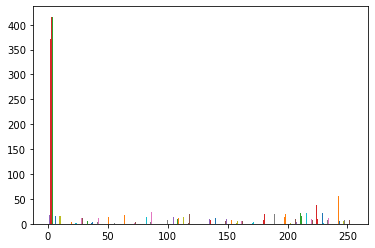

In [37]:
plt.hist(result, bins='auto')

<PIL.Image.Image image mode=RGB size=421x481 at 0x7F46E4E992B0>


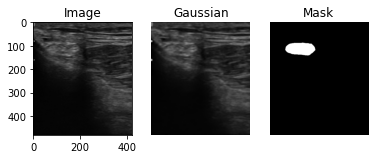

In [4]:
from utils import ext_transforms as et
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

img = Image.open('/mnt/server5/sdi/datasets/CPN_all/Images/FN_I0020546.bmp').convert('RGB')
ma = Image.open('/mnt/server5/sdi/datasets/CPN_all/Masks/FN_I0020546_mask.bmp').convert('L')
result, ma = et.GaussianBlur(kernel_size=(49, 49), sigma=(1, 2))(img, ma)
print(result)

plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Image')
plt.subplot(132), plt.imshow(np.array(result), cmap='gray'), plt.title('Gaussian'), plt.axis('off')
plt.subplot(133), plt.imshow(ma, cmap='gray'), plt.title('Mask'), plt.axis('off')
plt.show()

(481, 421)
object


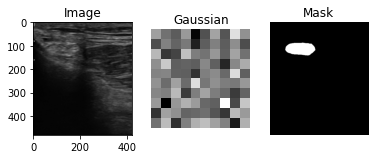

In [95]:
print(np.shape(img))
gp = np.random.normal(0, 20, (10, 10))
trans = et.GaussianPerturb(mean=0, std=100)
result, lbl = trans(img, ma)
#print(np.array(np.add(img, gp),).dtype)
print(np.array(result,).dtype)

plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Image')
plt.subplot(132), plt.imshow(gp, cmap='gray'), plt.title('Gaussian'), plt.axis('off')
plt.subplot(133), plt.imshow(lbl, cmap='gray'), plt.title('Mask'), plt.axis('off')
plt.show()

In [97]:
np.array(gp, dtype='uint8')

array([[ 14, 253, 244,  12, 209, 240,  16, 241,  41,   9],
       [238,   2, 247,   0, 220, 245,   1, 245,   7, 238],
       [ 25, 229, 234,  28,   1, 253,  11, 246,  16, 253],
       [  8,  31, 245, 247, 245,   5, 246, 222,   5,  19],
       [  3,   4, 246, 245, 228,   1,   6, 250,  39, 246],
       [  9, 250,  15, 250,  40, 255,   8,   0,   0,  12],
       [  4,   1,  25, 231,   1,  16,   0, 250, 231, 247],
       [ 12, 206,  11,  21,  13, 249, 246,  53, 237,  30],
       [227,  15,   8, 247, 249, 252, 241, 229,  25,  12],
       [253,  26, 226,   1,  21,  27,  15,   2, 217,  21]], dtype=uint8)

In [5]:
result, _ = et.ExtToTensor(normalize=False)(img, ma)
result

tensor([[[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
         [134., 134., 134.,  ...,  36.,  36.,  36.],
         [134., 134., 134.,  ...,  36.,  40.,  43.],
         ...,
         [  0.,   0.,   0.,  ...,  12.,  12.,  12.],
         [  0.,   0.,   0.,  ...,   7.,   7.,   7.],
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.]],

        [[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
         [134., 134., 134.,  ...,  36.,  36.,  36.],
         [134., 134., 134.,  ...,  36.,  40.,  43.],
         ...,
         [  0.,   0.,   0.,  ...,  12.,  12.,  12.],
         [  0.,   0.,   0.,  ...,   7.,   7.,   7.],
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.]],

        [[  0.,   0.,   0.,  ...,   0.,   0.,   0.],
         [134., 134., 134.,  ...,  36.,  36.,  36.],
         [134., 134., 134.,  ...,  36.,  40.,  43.],
         ...,
         [  0.,   0.,   0.,  ...,  12.,  12.,  12.],
         [  0.,   0.,   0.,  ...,   7.,   7.,   7.],
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.]]]

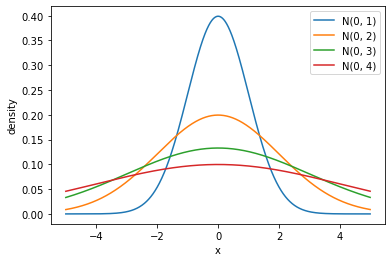

In [23]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-5, 5, 0.01)

def gaussian(x, mean, sigma):
    return (1 / np.sqrt(2*np.pi * sigma**2)) * np.exp(- (x-mean)**2 / (2*sigma**2))

legend = []
for i in range(1, 5):
    legend.append(f'N(0, {i})')
    plt.plot(x, gaussian(x, 0, i))

plt.xlabel('x')
plt.ylabel('density')
plt.legend(legend)
plt.show()